In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import ast

In [24]:
#path where you stored your copy of the nuScenes dataset.
DATAROOT = Path('/home/saramontese/Desktop/MasterThesis/example/dataset/data/sets/nuscenes')
dataset_file = 'train_v1.0-trainval_lidar_1.csv'

# Data Analysis


The dataset contains the following columns for each state of the self-driving car:

- instance_token: A unique identifier for the vehicle instance.
- translation: The vehicle's position in 3D space (x, y, z coordinates).
- yaw: The orientation of the vehicle around the vertical axis (rotation angle).
- velocity: The vehicle's speed in a given direction.
- acceleration: The change in velocity over time.
- heading_change_rate: The rate of change of the vehicle's direction.
- timestamp: The time at which the state was recorded.
- scene_token: A unique identifier for the scenario or environment the vehicle is in

Load the CSV data into a DataFrame


In [25]:

dtype_dict = {
    'modality': 'category',  # for limited set of modalities, 'category' is efficient
    'scene_token': 'str',
    'steering_angle':'float64',
    'location':'str',  
    'timestamp': 'str',  # To enable datetime operations
    'rotation': 'object',  # Quaternion (lists)
    'x': 'float64',
    'y': 'float64',
    'z': 'float64',
    'yaw': 'float64',  
    'velocity': 'float64',
    'acceleration': 'float64',
    'yaw_rate': 'float64'
}
df = pd.read_csv(DATAROOT / dataset_file, dtype=dtype_dict, parse_dates=['timestamp'])

df.head()

,sample_token,scene_token,steering_angle,location,CAM_FRONT,CAM_BACK,modality,timestamp,rotation,x,y,z,yaw,velocity,yaw_rate,acceleration
0,3481dbfd65864925b4a4b2d6b7256d44,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('human.pedestrian.adult', 'pedestrian.standi...","{('vehicle.car', 'vehicle.stopped'): 4, ('vehi...",lidar,2018-07-27 16:20:29.048702,"[0.27668389210179944, -0.0026796705507768723, ...",427.968583,1622.155828,0.0,2.580930,0.000004,0.000033,0.000000
1,394d87634b6c46049c2f06e84026096a,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('vehicle.trailer', 'vehicle.moving'): 1, ('h...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:29.548597,"[0.27667585323668453, -0.002728894247491543, 0...",427.968582,1622.155829,0.0,2.580947,0.000004,0.000033,0.000000
2,656b4207ba9542b2a9bb7c03aa61b325,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('vehicle.trailer', 'vehicle.moving'): 1, ('v...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:30.048445,"[0.2766247744031405, -0.0027369692279543625, 0...",427.968589,1622.155824,0.0,2.581053,0.000018,0.000212,0.000028
3,2f789ae558a84df9b8daee0674a7985f,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('vehicle.trailer', 'vehicle.moving'): 1, ('v...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:30.548859,"[0.27663215946727443, -0.002737971665731827, 0...",427.968593,1622.155822,0.0,2.581038,0.000008,-0.000031,-0.000020
4,623e58c15be546b39a36796a5b03d18f,0053e9c440a94c1b84bd9c4223efc4b0,0.178096,boston-seaport,"{('vehicle.trailer', 'vehicle.moving'): 1, ('v...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:31.048731,"[0.27662503731230986, -0.002729398219646146, 0...",427.968591,1622.155823,0.0,2.581052,0.000004,0.000029,-0.000008


In [6]:
df.shape

(26848, 14)

### Variantion for position, velocity, acceleration, yaw, heading_change_rate

In [26]:
# Group by 'scene_token'
grouped_df = df.groupby('scene_token')

# Differences for each feature
delta_df = pd.DataFrame({
    'x_diff': grouped_df['x'].diff(),
    'y_diff': grouped_df['y'].diff(),
    'z_diff': grouped_df['z'].diff(),
    'velocity_diff': grouped_df['velocity'].diff(),
    'acceleration_diff': grouped_df['acceleration'].diff(),
    'yaw_diff': grouped_df['yaw'].diff(),
    'yaw_rate_diff': grouped_df['yaw_rate'].diff(),
    'steering_angle_diff': grouped_df['steering_angle'].diff()
})


In [27]:
# Absolute differences for each feature
abs_df = pd.DataFrame({
    'abs_x_diff': grouped_df['x'].diff().abs(),
    'abs_y_diff': grouped_df['y'].diff().abs(),
    'abs_z_diff': grouped_df['z'].diff().abs(),
    'abs_velocity_diff': grouped_df['velocity'].diff().abs(),
    'abs_acceleration_diff': grouped_df['acceleration'].diff().abs(),
    'abs_yaw_diff': grouped_df['yaw'].diff().abs(),
    'abs_yaw_rate_diff': grouped_df['yaw_rate'].diff(),
    'abs_steering_angle_diff': grouped_df['steering_angle'].diff()
})

### Feature analysis

####  Original Dataset

In [28]:
numeric_columns = ['velocity', 'acceleration', 'yaw', 'yaw_rate', 'steering_angle']

stats = df[numeric_columns].describe()
stats.loc[['mean', 'std', 'min', 'max']]

,velocity,acceleration,yaw,yaw_rate,steering_angle
mean,5.054091e+00,0.006910,0.250847,-0.002240,-0.038149
std,3.601546e+00,0.631282,1.833596,0.797675,1.106266
min,3.050844e-09,-4.839118,-3.141337,-15.664581,-8.518880
max,1.773620e+01,3.383211,3.141424,13.588841,8.705702


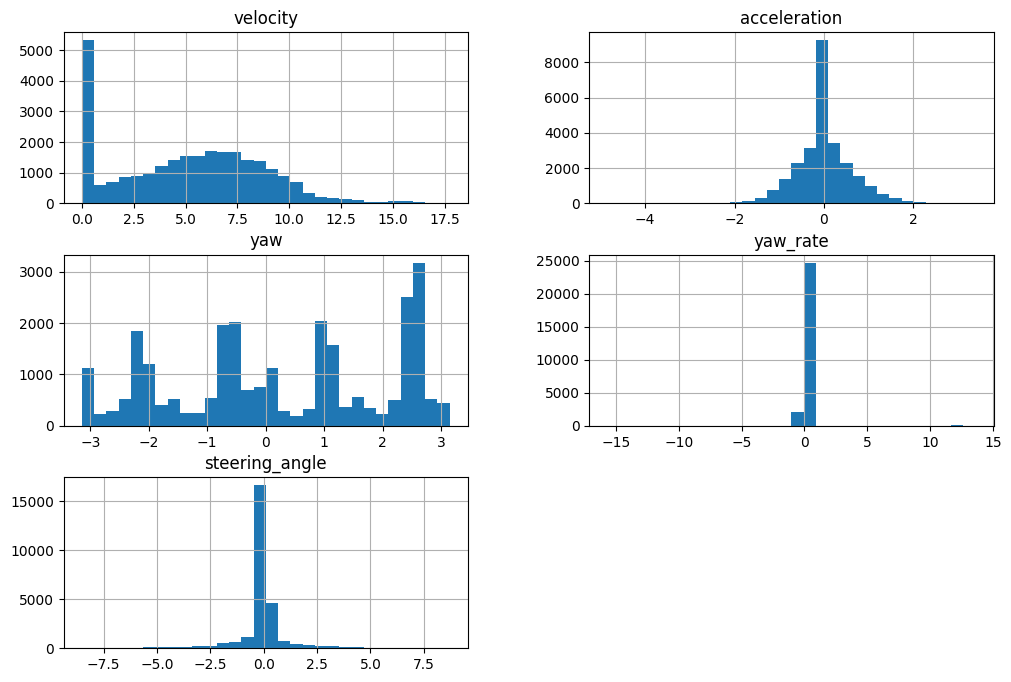

In [29]:
df[numeric_columns].hist(bins=30, figsize=(12, 8))

plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

#### Acceleration Box Plot to determine acceleration Threshold 

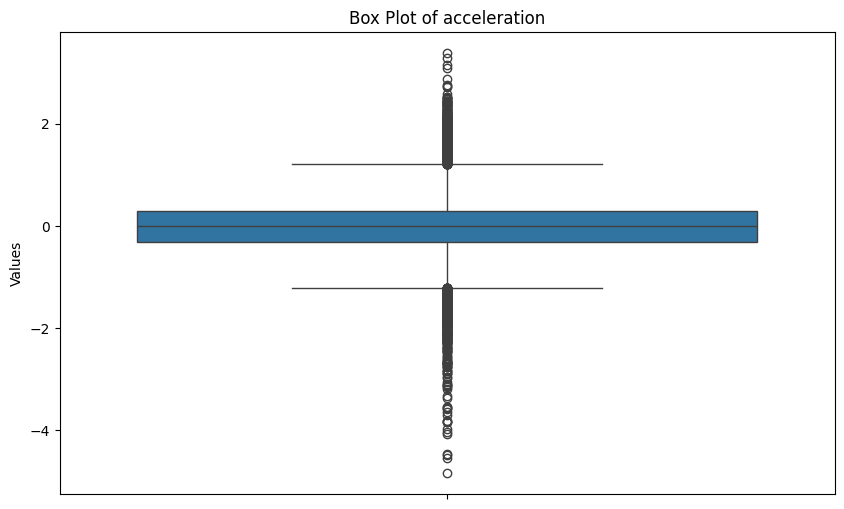

In [30]:
import seaborn as sns

# Alternatively, using seaborn for a more polished plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='acceleration')
plt.title('Box Plot of acceleration')
plt.ylabel('Values')
plt.show()

In [31]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['acceleration'].quantile(0.25)
Q3 = df['acceleration'].quantile(0.75)
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')

Q1: -0.30785066364635033
Q3: 0.3003512423904112



#### Distribution of Annotations for each scene

In [56]:
df.head()

,sample_token,scene_token,steering_angle,location,CAM_FRONT,CAM_BACK,modality,timestamp,rotation,x,y,z,yaw,velocity,yaw_rate,acceleration
0,3481dbfd65864925b4a4b2d6b7256d44,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('human.pedestrian.adult', 'pedestrian.standi...","{('vehicle.car', 'vehicle.stopped'): 4, ('vehi...",lidar,2018-07-27 16:20:29.048702,"[0.27668389210179944, -0.0026796705507768723, ...",427.968583,1622.155828,0.0,2.580930,0.000004,0.000033,0.000000
1,394d87634b6c46049c2f06e84026096a,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('vehicle.trailer', 'vehicle.moving'): 1, ('h...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:29.548597,"[0.27667585323668453, -0.002728894247491543, 0...",427.968582,1622.155829,0.0,2.580947,0.000004,0.000033,0.000000
2,656b4207ba9542b2a9bb7c03aa61b325,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('vehicle.trailer', 'vehicle.moving'): 1, ('v...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:30.048445,"[0.2766247744031405, -0.0027369692279543625, 0...",427.968589,1622.155824,0.0,2.581053,0.000018,0.000212,0.000028
3,2f789ae558a84df9b8daee0674a7985f,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('vehicle.trailer', 'vehicle.moving'): 1, ('v...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:30.548859,"[0.27663215946727443, -0.002737971665731827, 0...",427.968593,1622.155822,0.0,2.581038,0.000008,-0.000031,-0.000020
4,623e58c15be546b39a36796a5b03d18f,0053e9c440a94c1b84bd9c4223efc4b0,0.178096,boston-seaport,"{('vehicle.trailer', 'vehicle.moving'): 1, ('v...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:31.048731,"[0.27662503731230986, -0.002729398219646146, 0...",427.968591,1622.155823,0.0,2.581052,0.000004,0.000029,-0.000008


In [58]:
results={}

cameras = ['CAM_FRONT', 'CAM_BACK']

# Loop through each unique scene
for scene in df['scene_token'].unique():
    scene_df = df[df['scene_token'] == scene][cameras]
    scene_results = []

    for _, frame in scene_df.iterrows():
        n_detections = {}
        
        for cam_type, objects in scene_df.items():
            tot_count = 0
            objects = frame[cam_type
                            ]
            for (category, _), count in ast.literal_eval(objects).items():
                
                #NOTE: filter useful categories only
                if 'object' not in category:
                    tot_count += count
            
            # Store the total count for the current camera type
            n_detections[cam_type] = tot_count
        
        # Store the counts for the current scene
        scene_results.append(n_detections)
    
    results[scene] = scene_results

results

{'0053e9c440a94c1b84bd9c4223efc4b0': [{'CAM_FRONT': 15, 'CAM_BACK': 7},
  {'CAM_FRONT': 12, 'CAM_BACK': 6},
  {'CAM_FRONT': 12, 'CAM_BACK': 5},
  {'CAM_FRONT': 11, 'CAM_BACK': 5},
  {'CAM_FRONT': 8, 'CAM_BACK': 5},
  {'CAM_FRONT': 6, 'CAM_BACK': 5},
  {'CAM_FRONT': 3, 'CAM_BACK': 5},
  {'CAM_FRONT': 6, 'CAM_BACK': 5},
  {'CAM_FRONT': 10, 'CAM_BACK': 5},
  {'CAM_FRONT': 14, 'CAM_BACK': 5},
  {'CAM_FRONT': 13, 'CAM_BACK': 6},
  {'CAM_FRONT': 14, 'CAM_BACK': 6},
  {'CAM_FRONT': 19, 'CAM_BACK': 6},
  {'CAM_FRONT': 20, 'CAM_BACK': 6},
  {'CAM_FRONT': 18, 'CAM_BACK': 6},
  {'CAM_FRONT': 16, 'CAM_BACK': 6},
  {'CAM_FRONT': 20, 'CAM_BACK': 6},
  {'CAM_FRONT': 17, 'CAM_BACK': 9},
  {'CAM_FRONT': 15, 'CAM_BACK': 7},
  {'CAM_FRONT': 13, 'CAM_BACK': 10},
  {'CAM_FRONT': 13, 'CAM_BACK': 11},
  {'CAM_FRONT': 15, 'CAM_BACK': 9},
  {'CAM_FRONT': 14, 'CAM_BACK': 12},
  {'CAM_FRONT': 11, 'CAM_BACK': 12},
  {'CAM_FRONT': 12, 'CAM_BACK': 13},
  {'CAM_FRONT': 13, 'CAM_BACK': 16},
  {'CAM_FRONT': 14, 'CAM_B

Plot distribution across all scenes

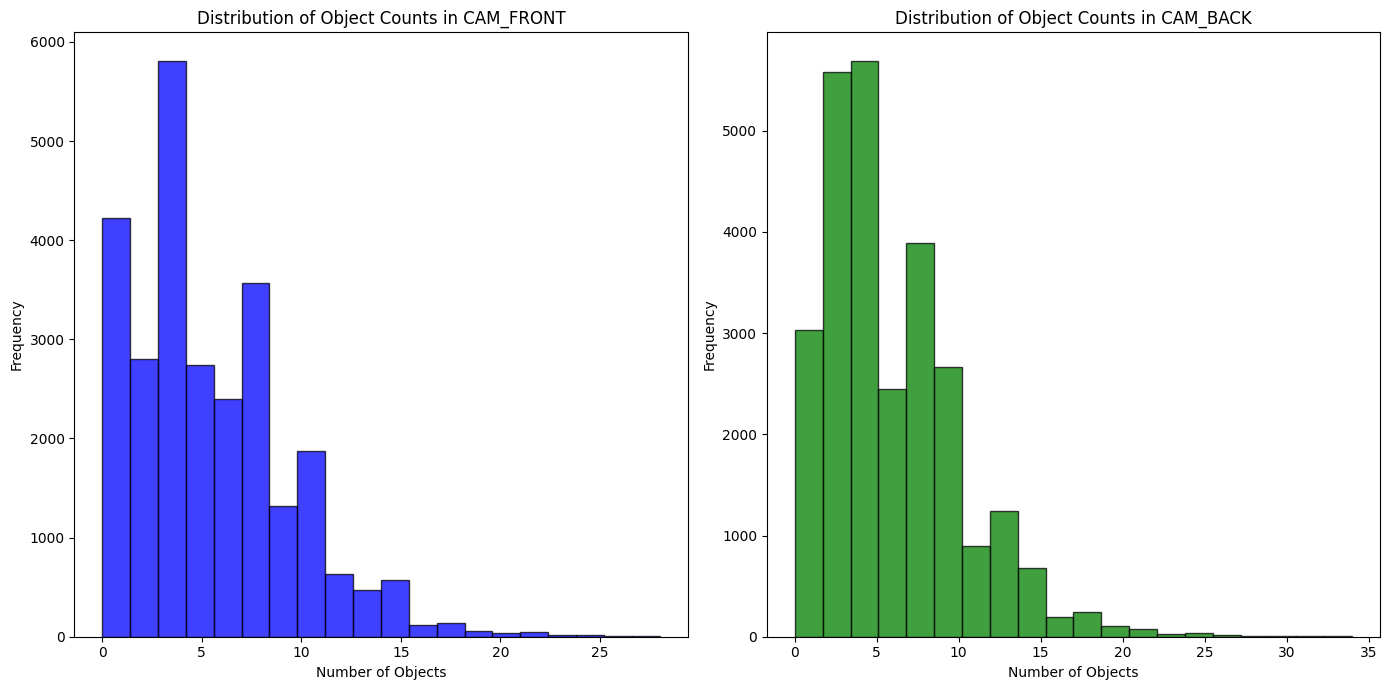

In [69]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns: 'scene_token', 'CAM_FRONT', 'CAM_BACK'

results = {}

cameras = ['CAM_FRONT', 'CAM_BACK']

# Lists to hold counts for plotting
cam_front_counts = []
cam_back_counts = []

# Loop through each unique scene
for scene in df['scene_token'].unique():
    scene_df = df[df['scene_token'] == scene]
    
    scene_results = []
    
    # Loop through each frame in the scene
    for _, frame in scene_df.iterrows():
        n_detections = {}
        
        # Loop through each camera type
        for cam_type in cameras:
            tot_count = 0
            objects = frame[cam_type]
            
            # Parse the objects and count the valid ones
            for (category, _), count in ast.literal_eval(objects).items():
                # Filter useful categories only
                if 'object' not in category:
                    tot_count += count
            
            # Store the total count for the current camera type
            n_detections[cam_type] = tot_count
            
            # Append counts to respective lists for plotting
            if cam_type == 'CAM_FRONT':
                cam_front_counts.append(tot_count)
            elif cam_type == 'CAM_BACK':
                cam_back_counts.append(tot_count)
        
        # Store the counts for the current frame in the scene
        scene_results.append(n_detections)
    
    # Store the counts for the current scene
    results[scene] = scene_results

# Plotting the distributions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(cam_front_counts, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Object Counts in CAM_FRONT')
plt.xlabel('Number of Objects')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(cam_back_counts, bins=20, alpha=0.75, color='green', edgecolor='black')
plt.title('Distribution of Object Counts in CAM_BACK')
plt.xlabel('Number of Objects')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


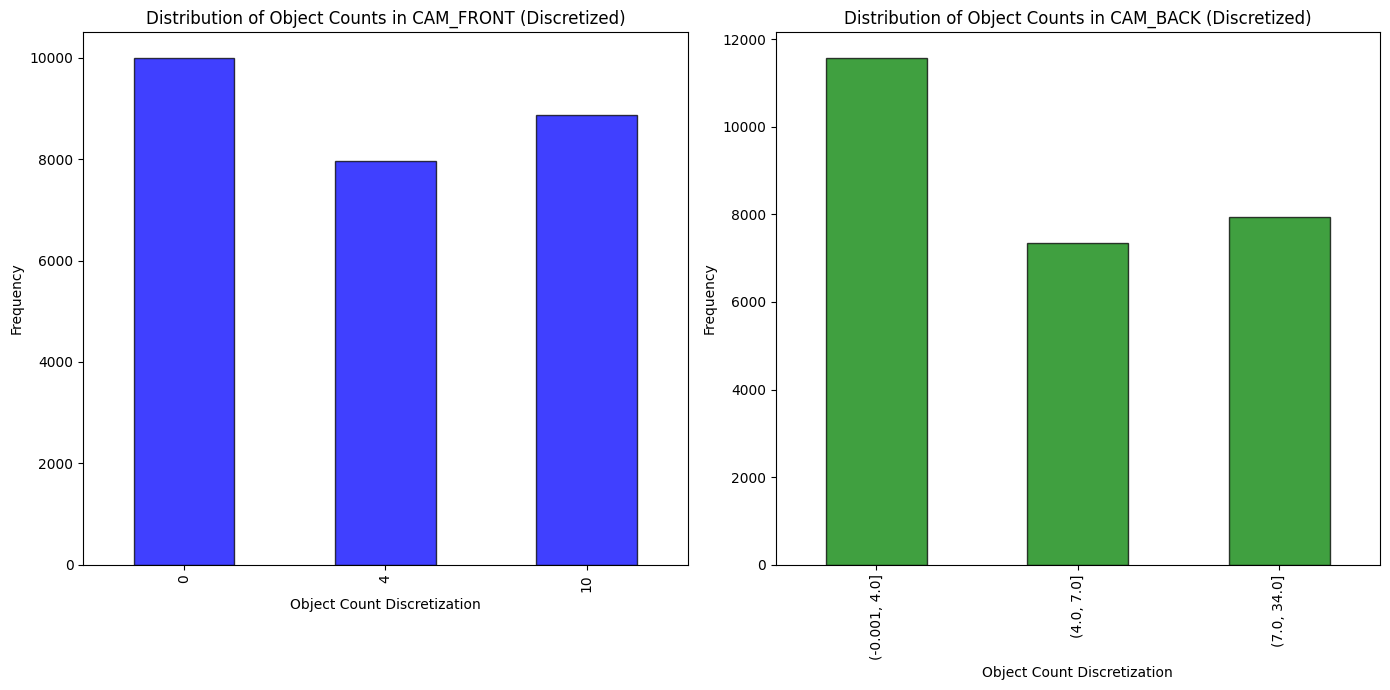

In [74]:
# Discretize the counts into 3 chunks of equal counts using qcut
cam_front_discretized = pd.qcut(cam_front_counts, q=3)#, labels=['Low', 'Medium', 'High'])
cam_back_discretized = pd.qcut(cam_back_counts, q=3)#, labels=['Low', 'Medium', 'High'])

# Plotting the distributions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
cam_front_discretized.value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black', alpha=0.75)
plt.title('Distribution of Object Counts in CAM_FRONT (Discretized)')
plt.xlabel('Object Count Discretization')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
cam_back_discretized.value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black', alpha=0.75)
plt.title('Distribution of Object Counts in CAM_BACK (Discretized)')
plt.xlabel('Object Count Discretization')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Correlation Matrix

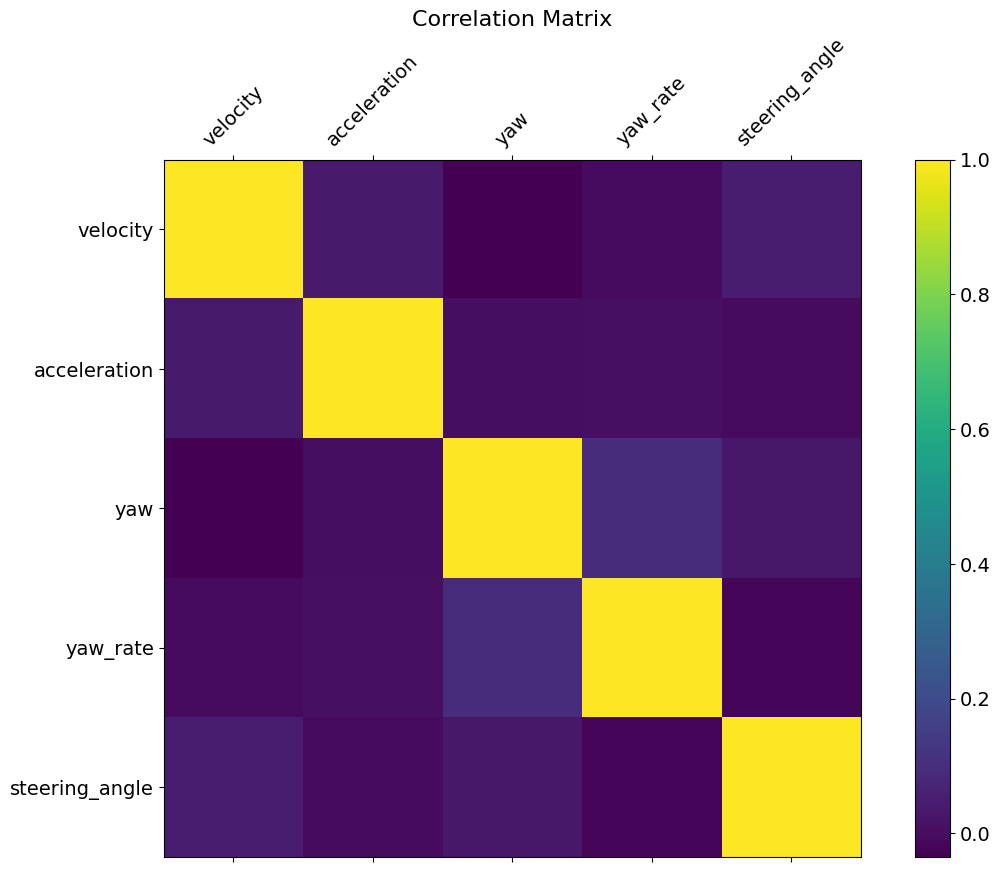

In [15]:
f = plt.figure(figsize=(14, 9))
plt.matshow(df[numeric_columns].corr(), fignum=f.number)
plt.xticks(range(df[numeric_columns].select_dtypes(['number']).shape[1]), df[numeric_columns].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df[numeric_columns].select_dtypes(['number']).shape[1]), df[numeric_columns].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### Variation  Dataset

In [16]:
stats = delta_df[['x_diff', 'y_diff', 'z_diff', 'velocity_diff', 'acceleration_diff', 'yaw_diff','yaw_rate_diff', 'steering_angle_diff']].describe()
stats.loc[['mean', 'std', 'min', 'max']]


,x_diff,y_diff,z_diff,velocity_diff,acceleration_diff,yaw_diff,yaw_rate_diff,steering_angle_diff
mean,0.029206,0.065605,0.0,0.003581,-0.000164,-0.000227,0.002134,0.001257
std,2.319725,2.056888,0.0,0.318594,0.421287,0.392567,1.126502,0.285415
min,-7.939933,-7.394914,0.0,-2.418950,-3.468057,-6.282092,-25.096220,-3.790855
max,8.450918,6.814903,0.0,1.695012,3.209952,6.279785,15.763745,4.827581


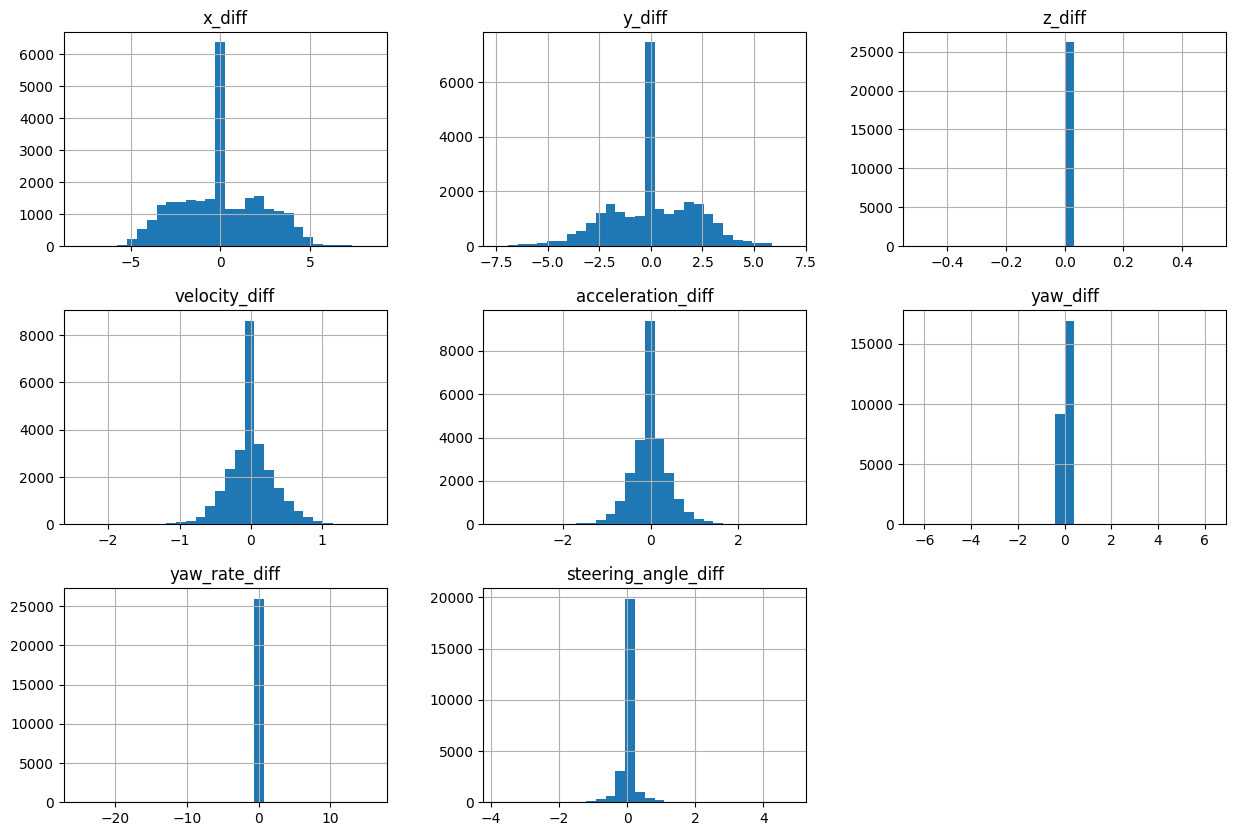

In [17]:
delta_df[['x_diff', 'y_diff', 'z_diff', 'velocity_diff', 'acceleration_diff', 'yaw_diff','yaw_rate_diff', 'steering_angle_diff']].hist(bins=30, figsize=(15, 10))

plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

Correlation Matrix


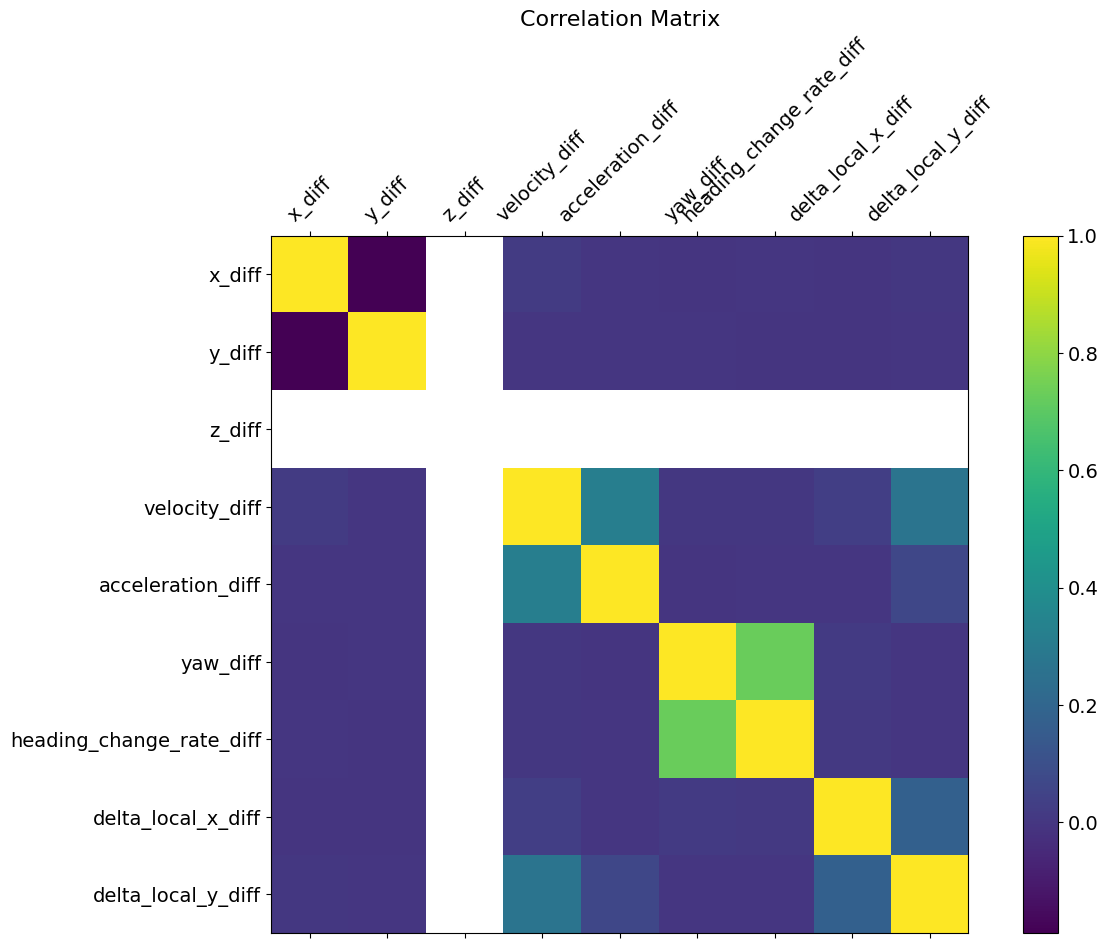

In [12]:
f = plt.figure(figsize=(14, 9))
plt.matshow(delta_df.corr(), fignum=f.number)
plt.xticks(range(delta_df.select_dtypes(['number']).shape[1]), delta_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(delta_df.select_dtypes(['number']).shape[1]), delta_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### Absolute Variation Dataset

In [13]:
abs_stats = abs_df[['abs_x_diff', 'abs_y_diff', 'abs_z_diff', 'abs_velocity_diff', 'abs_acceleration_diff', 'abs_yaw_diff', 'abs_heading_change_rate_diff']].describe()
abs_stats.loc[['mean', 'std', 'min', 'max']]


,abs_x_diff,abs_y_diff,abs_z_diff,abs_velocity_diff,abs_acceleration_diff,abs_yaw_diff,abs_heading_change_rate_diff
mean,1.789415,1.527369,0.0,0.225481,0.291673,4.269880e-02,1.109678e-01
std,1.487278,1.399603,0.0,0.230947,0.302876,3.862625e-01,1.133083e+00
min,0.000000,0.000000,0.0,0.000000,0.000000,1.048140e-11,1.233002e-11
max,8.450918,7.394914,0.0,2.418950,4.843464,6.280909e+00,2.511280e+01


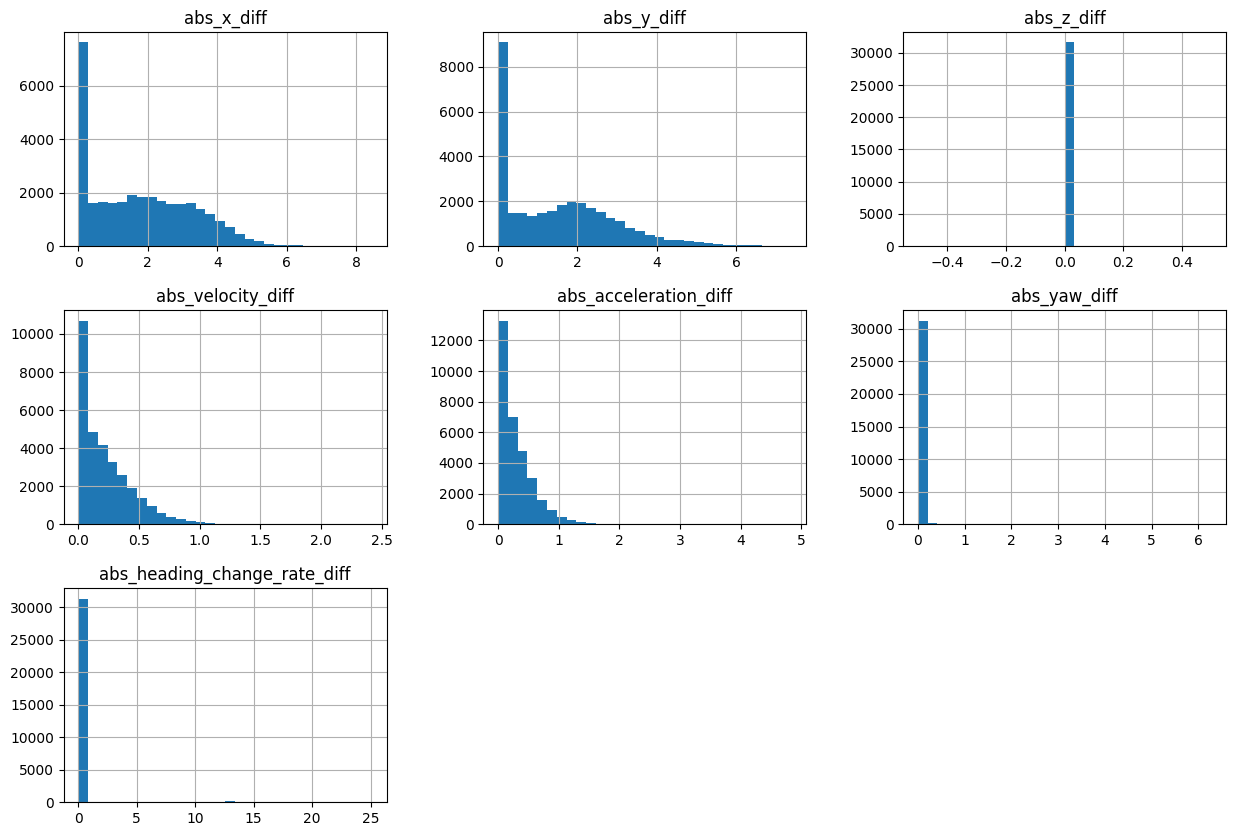

In [14]:
abs_df[['abs_x_diff', 'abs_y_diff', 'abs_z_diff', 'abs_velocity_diff', 'abs_acceleration_diff', 'abs_yaw_diff', 'abs_heading_change_rate_diff']].hist(bins=30, figsize=(15, 10))

plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

- x_diff: Since these have broader distributions, setting a threshold might require some context of the movement. If you're looking to detect significant lateral movements (e.g., lane changes), you might set a threshold around the higher frequency lower-end values.

- y_diff:

- z_diff: The z differences are concentrated near zero, indicating that there is very little change in the vertical position, which is expected for a vehicle traveling on relatively flat surfaces.


- velocity_diff: high concentration at the lower end, suggesting that velocity changes between consecutive measurements are generally small, with occasional larger changes. Plausible threshold to detect meaningful acceleration or deceleration might be set just above the most frequent low-end changes, possibly in the range where the histogram bars start to significantly lower. (0.1-0.2 m/s)


- acceleration_diff: most acceleration changes are close to zero, with a few instances of larger differences. This pattern is typical for driving in urban environments, where acceleration and deceleration are frequent but not extreme. Threshold might be set at a value that excludes the majority of these minor changes but captures the less frequent larger changes.


- yaw_diff: histogram is highly skewed towards smaller values, indicating that most of the time, there are only slight changes in orientation, which corresponds to driving mostly straight with occasional turns.


- heading_change_rate_diff: Similar to yaw_diff, the histogram for heading change rate differences is skewed towards smaller values. The vehicle mostly maintains its heading with only slight variations within the sampled timeframe.
